### Fundamental Diagram
Not linearized yet.. Just to check 


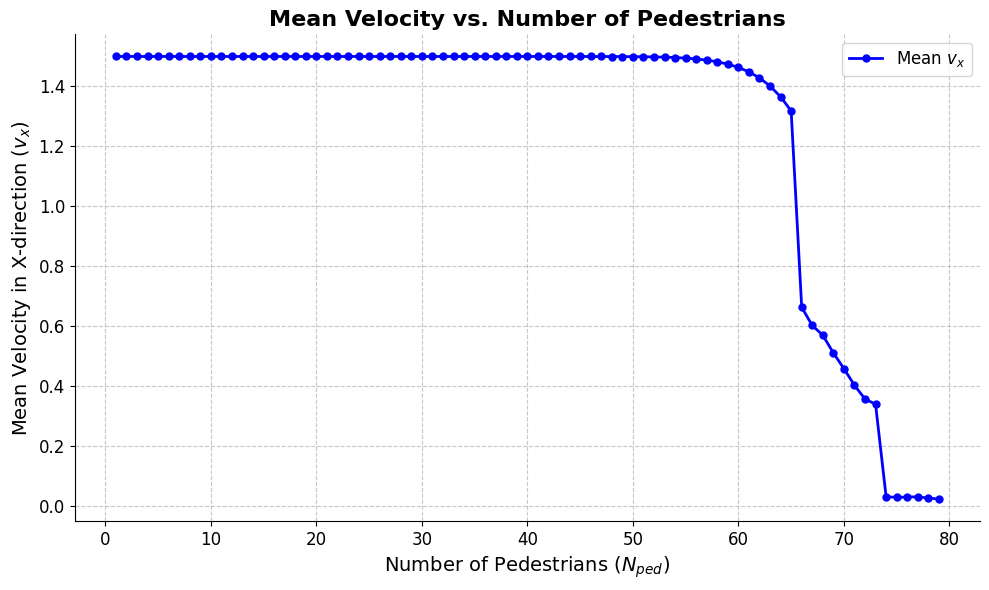

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Load data from file
file_path = 'Data_03112024\mean_velocities.txt'
data = np.loadtxt(file_path, delimiter='\t', skiprows=1)

# Extract N_ped and Mean_vx
N_ped = data[:, 0]
Mean_vx = data[:, 1]

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
ax.plot(N_ped, Mean_vx, color='b', linewidth=2, linestyle='-', marker='o', markersize=5, label='Mean $v_x$')

# Set title and labels
ax.set_title('Mean Velocity vs. Number of Pedestrians', fontsize=16, fontweight='bold')
ax.set_xlabel('Number of Pedestrians ($N_{ped}$)', fontsize=14)
ax.set_ylabel('Mean Velocity in X-direction ($v_x$)', fontsize=14)

# Add grid
ax.grid(True, linestyle='--', alpha=0.7)

# Customize ticks
ax.tick_params(axis='both', which='major', labelsize=12)

# Add legend
ax.legend(fontsize=12)

# Remove spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show plot
plt.tight_layout()
plt.show()

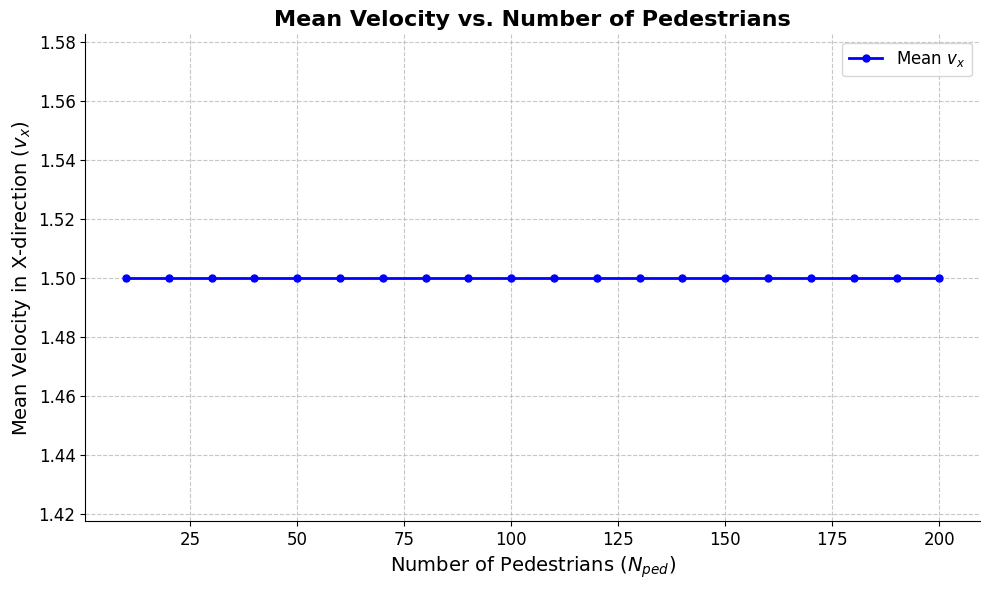

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Load data from file
file_path = 'Data_03112024/2D_Straight_Flow/mean_velocities.txt'
data = np.loadtxt(file_path, delimiter='\t', skiprows=1)

# Extract N_ped and Mean_vx
N_ped = data[:, 0]
Mean_vx = data[:, 1]

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
ax.plot(N_ped, Mean_vx, color='b', linewidth=2, linestyle='-', marker='o', markersize=5, label='Mean $v_x$')

# Set title and labels
ax.set_title('Mean Velocity vs. Number of Pedestrians', fontsize=16, fontweight='bold')
ax.set_xlabel('Number of Pedestrians ($N_{ped}$)', fontsize=14)
ax.set_ylabel('Mean Velocity in X-direction ($v_x$)', fontsize=14)

# Add grid
ax.grid(True, linestyle='--', alpha=0.7)

# Customize ticks
ax.tick_params(axis='both', which='major', labelsize=12)

# Add legend
ax.legend(fontsize=12)

# Remove spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
#!/usr/bin/python
import matplotlib
# matplotlib.use("macosx")

import matplotlib.pyplot as plt
import numpy as np
import os

try:
    import pandas as pd
    found_pandas = True
except ImportError:
    found_pandas = False

# Replace the base path where the files are stored
base_path = "Ageng_based_simulation\\Generalized_testing_framework\\Data_03112024\\1D_flow"
file_prefix = "traj_tau0.50_v01.50_Length100.00_Width0.00_periodicTrue_A2000.00_B0.08_delta_t0.20_N70"
file_suffix = ".txt"

ms = 22
mt = 16
lw = 0.05

# Length of the corridor, should match the simulation
Length = 100

# Create the filename for each tau
file1 = os.path.join(base_path, f"{file_prefix}{file_suffix}")

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

print("found_pandas: %r" % found_pandas)
print("loading file %s" % file1)
if found_pandas:  # This is about 15 times faster than np.loadtxt()
    A1 = np.array(pd.read_csv(file1, sep="\\s+", header=None, skiprows=1))
else:
    A1 = np.loadtxt(file1)

print("finished loading")
ids = np.unique(A1[:, 0]).astype(int)
frames = A1[:, 1]
figname = file1.split(".txt")[0]

# Plotting data for each pedestrian
for i in ids[::2]:
    p = A1[A1[:, 0] == i]
    x1 = p[:, 1]  # time
    y1 = np.fmod(p[:, 2], Length)  # x position within the corridor
    abs_d_data = np.abs(np.diff(y1))
    abs_mean = abs_d_data.mean()
    abs_std = abs_d_data.std()
    if abs_std <= 0.5 * abs_mean:
        T = []
    else:
        T = np.nonzero(abs_d_data > abs_mean + 3 * abs_std)[0]

    start = 0
    for t in T:
        plt.plot(y1[start:t], x1[start:t], "k.", ms=lw, lw=lw, rasterized=True)
        start = t + 1

    plt.plot(y1[start:], x1[start:], "k.", ms=lw, lw=lw, rasterized=True)

# Labels and formatting
plt.xlabel(r"$x_n$", size=ms)
plt.ylabel(r"$t\; \rm{(s)}$", size=ms)
plt.xticks(fontsize=mt)
plt.yticks(fontsize=mt)
fig.set_tight_layout(True)

# Save the figure for each tau value
for e in ["png"]:  # , "eps"] if you want other formats
    fname = figname + "." + e
    plt.savefig(fname)
    print(">> figname: %s" % fname)

# Show plot for this tau value
plt.show()
